🔹 Transaction-level dataset (540k rows)

Here, you do structural and sanity EDA, not behavioral modeling.

You focus on:

1. Data types & nulls ✅

2. Date range & temporal coverage ✅

3. Distribution of purchase_quantity, return_quantity, purchase_amount, return_amount & UnitPrice ✅

4. % returns vs purchases ✅

5. Invoice structure (items per invoice)

6. Obvious data issues (zero price, negative price, etc.) ✅

Purpose:

Understand data quality and mechanics of transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('../data/raw/online_retail.xlsx')

1. Data types & nulls ✅

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df=df.dropna(subset=['CustomerID'])
df.shape

(406829, 8)

In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df['purchase_qty'] = df['Quantity'].apply(lambda x: x if x > 0 else 0)
df['purchase_amnt']=df['purchase_qty']*df['UnitPrice']
df['return_qty']=df['Quantity'].apply(lambda x: abs(x) if x < 0 else 0)
df['return_amnt']=df['return_qty']*df['UnitPrice']


In [11]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,purchase_qty,purchase_amnt,return_qty,return_amnt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,6,15.30,0,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,20.34,0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,22.00,0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,20.34,0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,20.34,0,0.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2,15.30,0,0.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,6,25.50,0,0.0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,6,11.10,0,0.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,6,11.10,0,0.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,32,54.08,0,0.0


In [12]:
print(df['CustomerID'].nunique())

4372


2. Date range & temporal coverage ✅

In [ ]:
min_date=df['InvoiceDate'].min()
max_date=df['InvoiceDate'].max()
print(f"Date ranges from {min_date} to {max_date}")

Date ranges from 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Price ranges from 0.0 to 38970.0
Return quantity ranges from 0 to 80995
Purchase quantity ranges from 0 to 80995
Return amnt ranges from 0.0 to 168469.6
Purchase amnt ranges from 0.0 to 168469.6


In [20]:
print((df['UnitPrice']==0).sum())
df = df[df['UnitPrice'] != 0]

40


In [22]:
print(df.shape)

(406789, 13)


In [14]:
df['date_months']=df['InvoiceDate'].dt.to_period('M')
monthly_transactions=df.groupby('date_months').size()

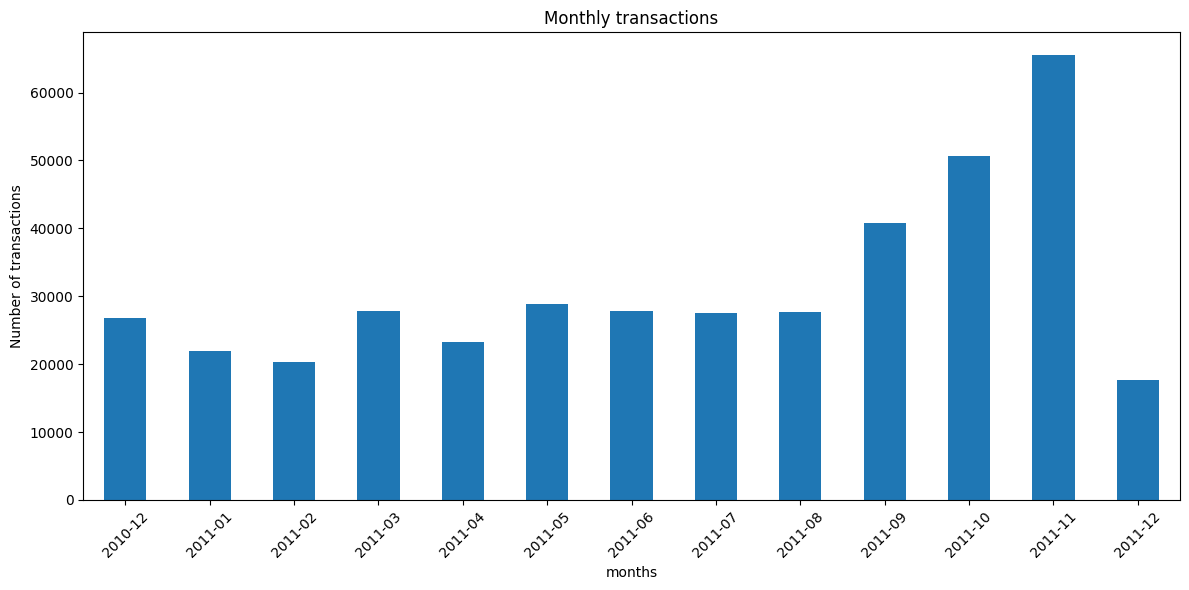

In [15]:
plt.figure(figsize=(12,6))
monthly_transactions.plot(kind='bar')
plt.title('Monthly transactions')
plt.xlabel('months')
plt.ylabel('Number of transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Distribution of purchase_quantity, return_quantity, purchase_amount, return_amount & UnitPrice ✅

In [ ]:
min_price=df['UnitPrice'].min()
max_price=df['UnitPrice'].max()
print(f"Price ranges from {min_price} to {max_price}")

Price ranges from 0.001 to 38970.0


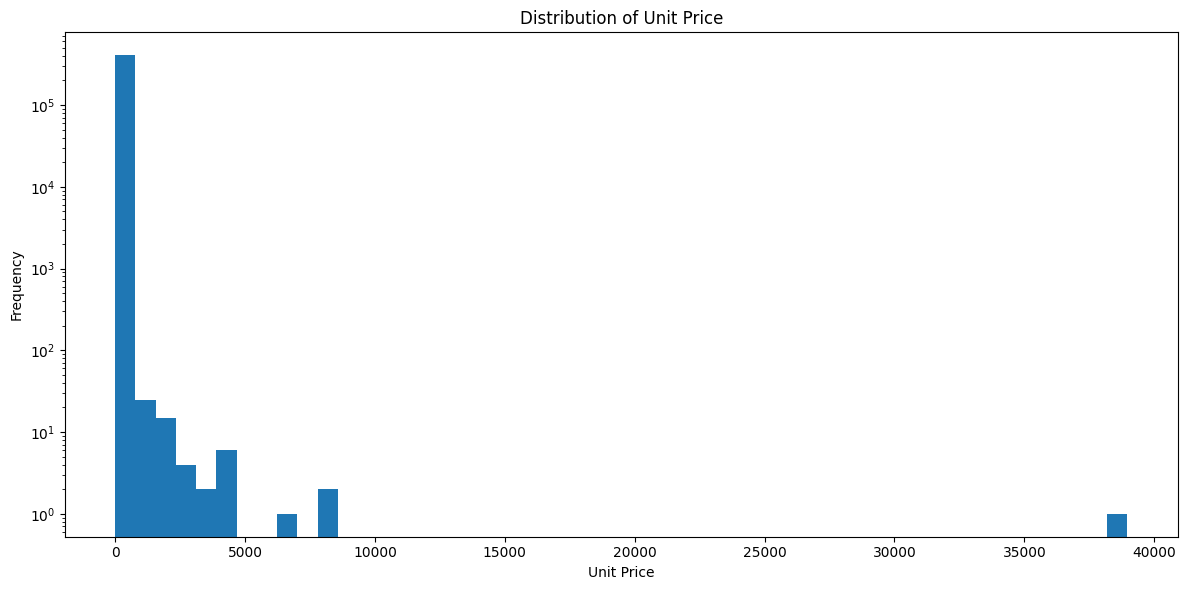

In [49]:
plt.figure(figsize=(12,6))
plt.hist(df['UnitPrice'], bins=50,log=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [44]:
min_purchase_quantity=df['purchase_qty'].min()
max_purchase_quantity=df['purchase_qty'].max()
print(f"Purchase quantity ranges from {min_purchase_quantity} to {max_purchase_quantity}")

min_return_quantity=df['return_qty'].min()
max_return_quantity=df['return_qty'].max()
print(f"Return quantity ranges from {min_return_quantity} to {max_return_quantity}")

Purchase quantity ranges from 0 to 80995
Return quantity ranges from 0 to 80995


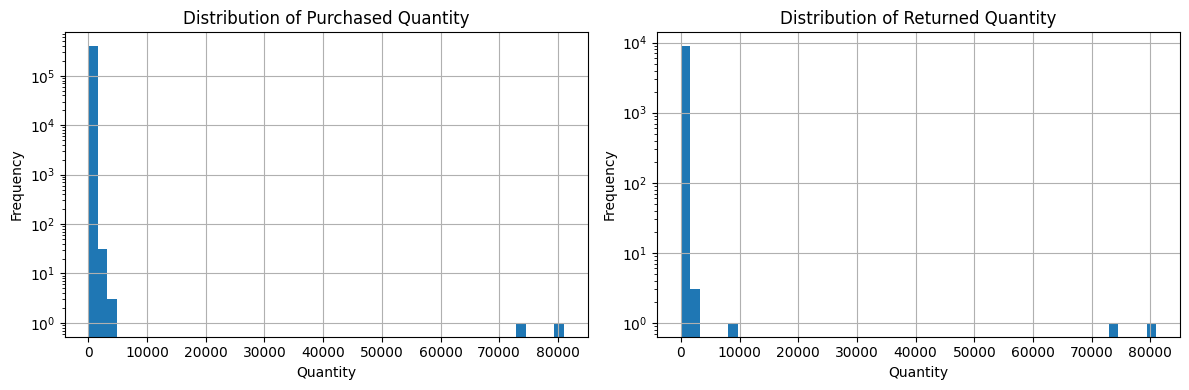

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution of Purchased Quantity
df[df['purchase_qty'] > 0]['purchase_qty'].hist(bins=50, ax=axes[0],log=True)
axes[0].set_title('Distribution of Purchased Quantity')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

# Distribution of Returned Quantity
df[df['return_qty'] > 0]['return_qty'].hist(bins=50, ax=axes[1],log=True)
axes[1].set_title('Distribution of Returned Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [46]:
min_purchase_amnt=df['purchase_amnt'].min()
max_purchase_amnt=df['purchase_amnt'].max()
print(f"Purchase amnt ranges from {min_purchase_amnt} to {max_purchase_amnt}")

min_return_amnt=df['return_amnt'].min()
max_return_amnt=df['return_amnt'].max()
print(f"Return amnt ranges from {min_return_amnt} to {max_return_amnt}")

Purchase amnt ranges from 0.0 to 168469.6
Return amnt ranges from 0.0 to 168469.6


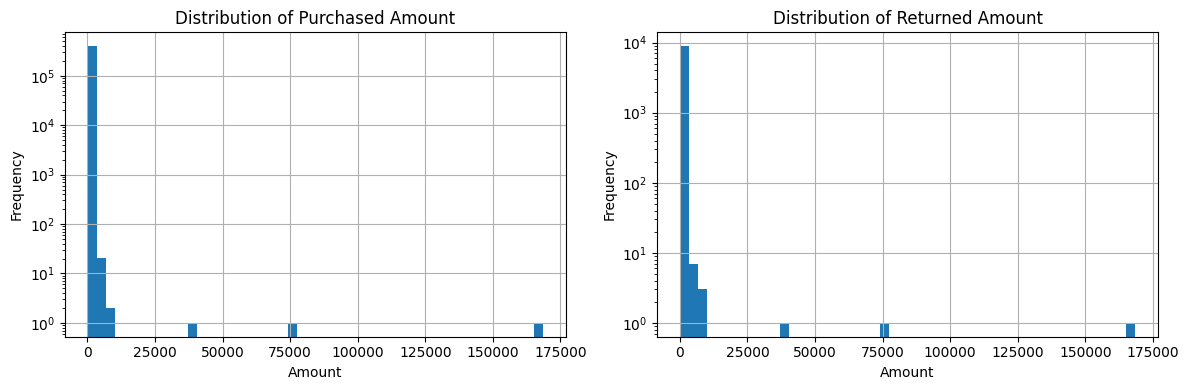

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution of Purchased Quantity
df[df['purchase_amnt'] > 0]['purchase_amnt'].hist(bins=50, ax=axes[0],log=True)
axes[0].set_title('Distribution of Purchased Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Distribution of Returned Quantity
df[df['return_amnt'] > 0]['return_amnt'].hist(bins=50, ax=axes[1],log=True)
axes[1].set_title('Distribution of Returned Amount')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

4. Returns vs purchases ✅

In [34]:
tot_purchases=df['purchase_qty'].sum()
tot_returns=df['return_qty'].sum()

per_return=tot_returns/(tot_purchases+tot_returns)*100
per_purchase=tot_purchases/(tot_purchases+tot_returns)*100

print(f"Percentage of returns: {per_return:.2f}%")
print(f"Percentage of purchases: {per_purchase:.2f}%")

tot_purchases_amnt=df['purchase_amnt'].sum()
tot_returns_amnt=df['return_amnt'].sum()

per_return_amnt=tot_returns_amnt/(tot_purchases_amnt+tot_returns_amnt)*100
per_purchase_amnt=tot_purchases_amnt/(tot_purchases_amnt+tot_returns_amnt)*100

tot_amnt=tot_purchases_amnt+tot_returns_amnt

print(f"Percentage of returns amnt: {per_return_amnt:.2f}%")
print(f"Percentage of purchases amnt: {per_purchase_amnt:.2f}%")
print(f"Return ratio(wrt quantity): {tot_returns/tot_purchases:.2f}")
print(f"Return ratio(wrt amount): {tot_returns_amnt/tot_purchases_amnt:.2f}")

Percentage of returns: 5.05%
Percentage of purchases: 94.95%
Percentage of returns amnt: 6.42%
Percentage of purchases amnt: 93.58%
Return ratio(wrt quantity): 0.05
Return ratio(wrt amount): 0.07


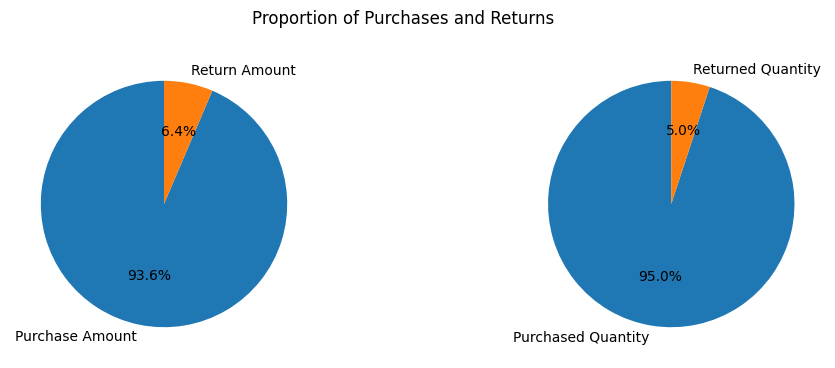

In [36]:
fig,axes=plt.subplots(1,2,figsize=(12,4))

labels_amnt=['Purchase Amount','Return Amount']
values_amnt=[tot_purchases_amnt,tot_returns_amnt]

labels_qty=['Purchased Quantity','Returned Quantity']
values_qty=[tot_purchases,tot_returns]

axes[0].pie(values_amnt, labels=labels_amnt, autopct='%1.1f%%', startangle=90)
axes[1].pie(values_qty, labels=labels_qty, autopct='%1.1f%%', startangle=90)
plt.suptitle('Proportion of Purchases and Returns')
plt.show()

5. Invoice structure (items per invoice)